In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [2]:
"""
    Reading the first differenced data, the log data and the stardatd data.
"""
data_log_diff = pd.read_csv('prediction_data.csv',index_col = 'date')
data_log = pd.read_csv('log_data.csv',index_col='date')
data = pd.read_csv('data.csv',index_col='date')
display(data_log_diff.head(10))

,value
date,
1949-02-01,0.052186
1949-03-01,0.112117
1949-04-01,-0.022990
1949-05-01,-0.064022
1949-06-01,0.109484
1949-07-01,0.091937
1949-08-01,0.000000
1949-09-01,-0.084557
1949-10-01,-0.133531


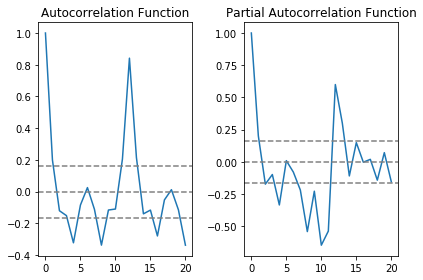

In [3]:
"""
    For this model we are going the forecast with ARIMA.
    First of all we need the (p,d,q) tuple and because we only have 1 difference the d=1.
    We will find p and q with ACF and PACF methods.
"""
from statsmodels.tsa.stattools import acf,pacf
lag_acf = acf(data_log_diff, nlags=20)
lag_pacf = pacf(data_log_diff, nlags=20, method = 'ols')

#Plotting the ACF and PACF graphs

#Plotting the ACF graph
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plotting the PACF graph
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


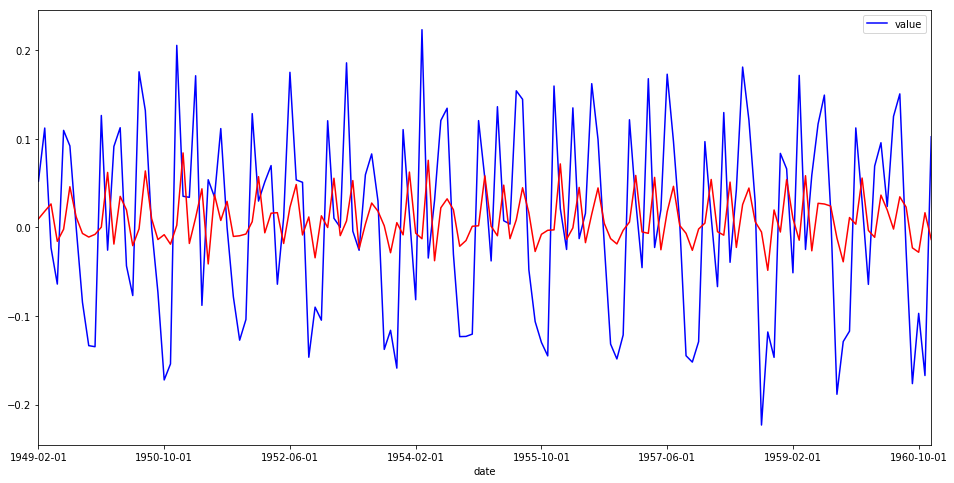

In [4]:
"""
    After we discover the values for p and q the next step is the forecast itself.
"""
from statsmodels.tsa.arima_model import ARIMA

#AR Model (q=0)
model = ARIMA(data_log,order = (2,1,0))
results_AR = model.fit(disp=-1)

#Plotting the AR Model
fig,ax = plt.subplots(figsize=(16,8))
data_log_diff.plot(color='blue',ax=ax)
results_AR.fittedvalues.plot(color='red',ax=ax)

E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


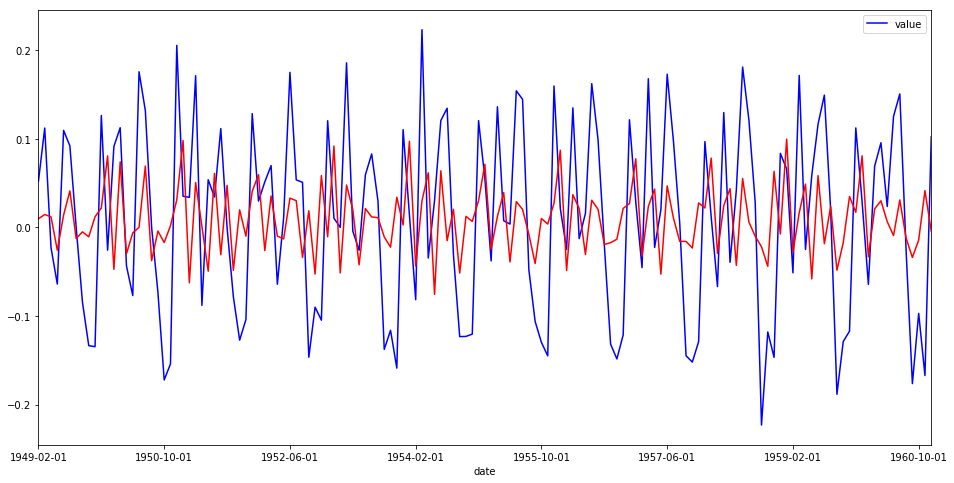

In [5]:
#MA Model
model = ARIMA(data_log,order = (0,1,2))
results_MA = model.fit(disp=-1)

#Plotting MA Model
fig,ax = plt.subplots(figsize=(16,8))
data_log_diff.plot(ax=ax,color='blue')
results_MA.fittedvalues.plot(ax=ax,color='red')

E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


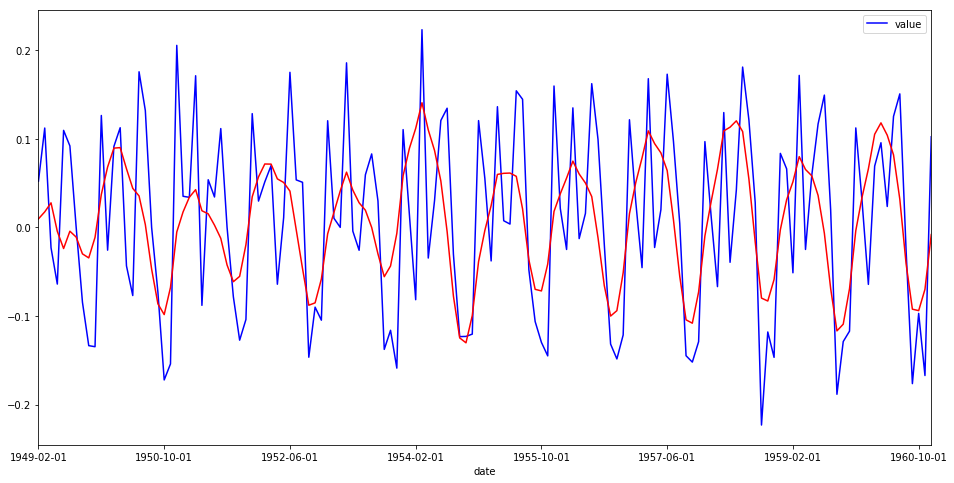

In [29]:
#ARIMA Model
model = ARIMA(data_log, order = (2,1,2))
results_ARIMA = model.fit(disp=-1)

#Plotting ARIMA Model
fig,ax = plt.subplots(figsize=(16,8))
data_log_diff.plot(ax=ax,color='blue')
results_ARIMA.fittedvalues.plot(ax=ax,color='red')

In [30]:
"""
    The last step is to make our data to its original state.
"""
#Making a series with out results
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
display(predictions_ARIMA_diff.head())

date
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64

In [31]:
#Converting from defferencing to log scale
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
display(predictions_ARIMA_diff_cumsum.head())

date
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64

In [32]:
predictions_ARIMA_log = pd.Series(data_log.iloc[:,0], index=data_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
display(predictions_ARIMA_log.head())

date
1949-01-01    4.718499
1949-02-01    4.780265
1949-03-01    4.909873
1949-04-01    4.914554
1949-05-01    4.846011
dtype: float64

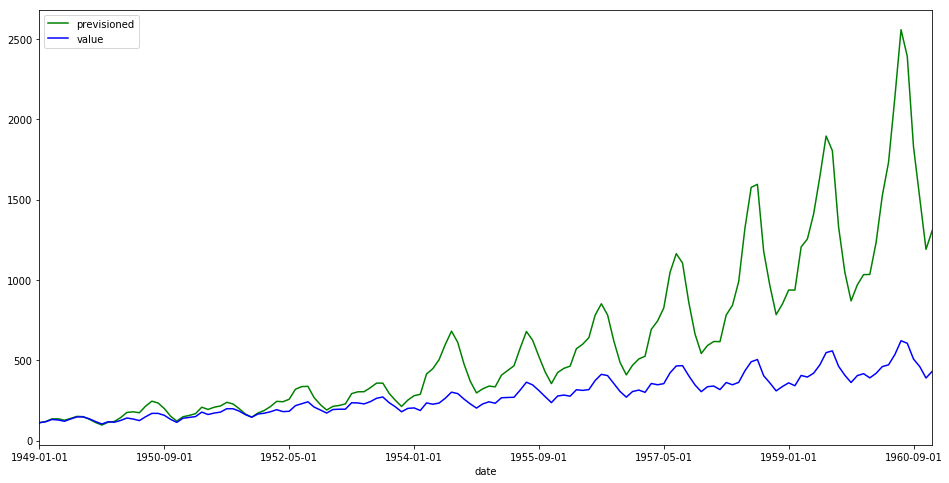

In [36]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
fig,ax = plt.subplots(figsize=(16,8))
predictions_ARIMA.plot(ax=ax,color='green',label = 'previsioned')
data.plot(ax=ax,color='blue',label='value')
plt.legend(loc='upper left')